In [1]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import cv2

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

In [2]:
import urllib.request

url = "https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/woman_hands.jpg"
filename = "image.jpg"
urllib.request.urlretrieve(url, filename)

('image.jpg', <http.client.HTTPMessage at 0x27b960e2fd0>)

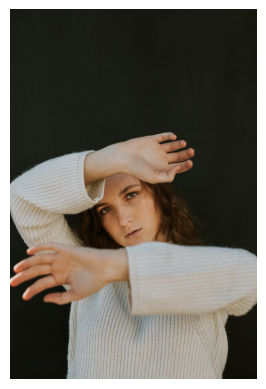

In [3]:
import cv2
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread("image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV는 기본적으로 BGR 형식으로 이미지를 불러오기 때문에 RGB로 변환

# 이미지 출력
plt.imshow(img)
plt.axis("off")  # 축 숨기기
plt.show()

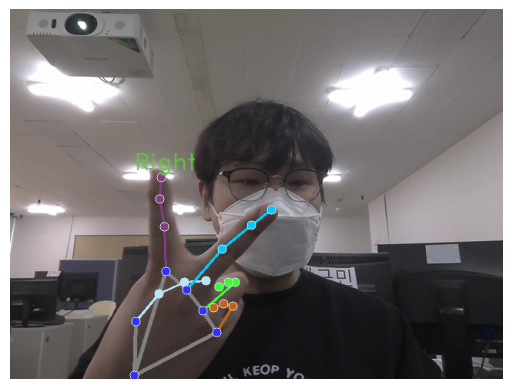

In [10]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import matplotlib.pyplot as plt

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='dataset/hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("dataset/scissors/0.jpg")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)

# 이미지 변환 작업을 수행한 후 annotated_image 변수가 완성되었다고 가정합니다.
annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)

# 이미지 표시 (cv2_imshow 대신 matplotlib 사용)
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))  # BGR에서 RGB로 변환하여 표시
plt.axis("off")  # 축 숨기기
plt.show()

In [5]:
# import cv2

# capture = cv2.VideoCapture(1)
# capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# # capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# while cv2.waitKey(33) < 0:
#     ret, frame = capture.read()
#     cv2.imshow("VideoFrame", frame)

# capture.release()
# cv2.destroyAllWindows()

# -----------------------------------------------------

# import cv2

# # 웹캠 초기화
# cap = cv2.VideoCapture(1)

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break
    
#     # 분석 코드 추가 (예: 영상 속 객체 탐지, 필터링 등)
#     # 예시: 그레이스케일 변환
#     gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
#     # 결과 출력
#     cv2.imshow('Webcam - Real-time Analysis', gray_frame)
    
#     # 'q' 키를 누르면 종료
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # 리소스 해제
# cap.release()
# cv2.destroyAllWindows()

In [6]:
# import cv2
# import torch
# import torchvision.transforms as transforms
# from torchvision.models import resnet18
# from PIL import Image

# # 사전 학습된 모델 로드
# model = resnet18(pretrained=True)
# model.eval()  # 평가 모드로 설정

# # 클래스 이름 로드
# classes = ['class1', 'class2', ...]  # 여기에 사용할 클래스 이름 리스트를 추가하세요.

# # 이미지 전처리 파이프라인 설정
# preprocess = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

# # 웹캠 초기화
# cap = cv2.VideoCapture(1)

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # 프레임을 PIL 이미지로 변환
#     pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
#     # 전처리 후 모델 예측
#     input_tensor = preprocess(pil_image).unsqueeze(0)
#     with torch.no_grad():
#         output = model(input_tensor)
    
#     # 예측 결과 해석
#     _, predicted_idx = torch.max(output, 1)
#     predicted_class = classes[predicted_idx]
    
#     # 결과를 화면에 표시
#     cv2.putText(frame, f"Prediction: {predicted_class}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
#     cv2.imshow('Webcam - Real-time Analysis', frame)

#     # 'q' 키를 누르면 종료
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # 리소스 해제
# cap.release()
# cv2.destroyAllWindows()

In [8]:
import cv2
import mediapipe as mp

# MediaPipe의 Hands 모듈 초기화
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# 웹캠 초기화
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # BGR 이미지를 RGB로 변환
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Hand Landmarker 모델로 손 랜드마크 탐지
    results = hands.process(rgb_frame)

    # 손이 감지되었을 경우 랜드마크 그리기
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # 결과 출력
    cv2.imshow('Hand Landmarker', frame)

    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 리소스 해제
cap.release()
cv2.destroyAllWindows()

c:\Users\zqrc0\anaconda3\envs\py09\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [8]:
# capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640)

In [9]:
# while cv2.waitKey(33) < 0:
#     ret, frame = capture.read()
#     cv2.imshow("VideoFrame", frame)

In [10]:
# capture.release()
# cv2.destroyAllWindows()